In [148]:
main_folder = "C:/Users/Rostom/Videos/5SDBD/Projet_Intégrateur/archive/"
ATTR_PATH = main_folder + "list_attr_celeba.csv"  
PARTITION_PATH = main_folder + "list_eval_partition.csv" 
IMAGES_PATH = main_folder + "img_align_celeba/img_align_celeba/"  
MODEL_HANDLE = "./model" 
IMAGE_SIZE = (220, 220)

In [149]:
df1 = pd.read_csv(ATTR_PATH, delimiter=',')
df1.dataframeName = 'list_attr_celeba.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(5)

There are 202599 rows and 41 columns


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [150]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})' )
        
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [151]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    #plt.axis("off")
    plt.show()


<ipython-input-150-947883772b32>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


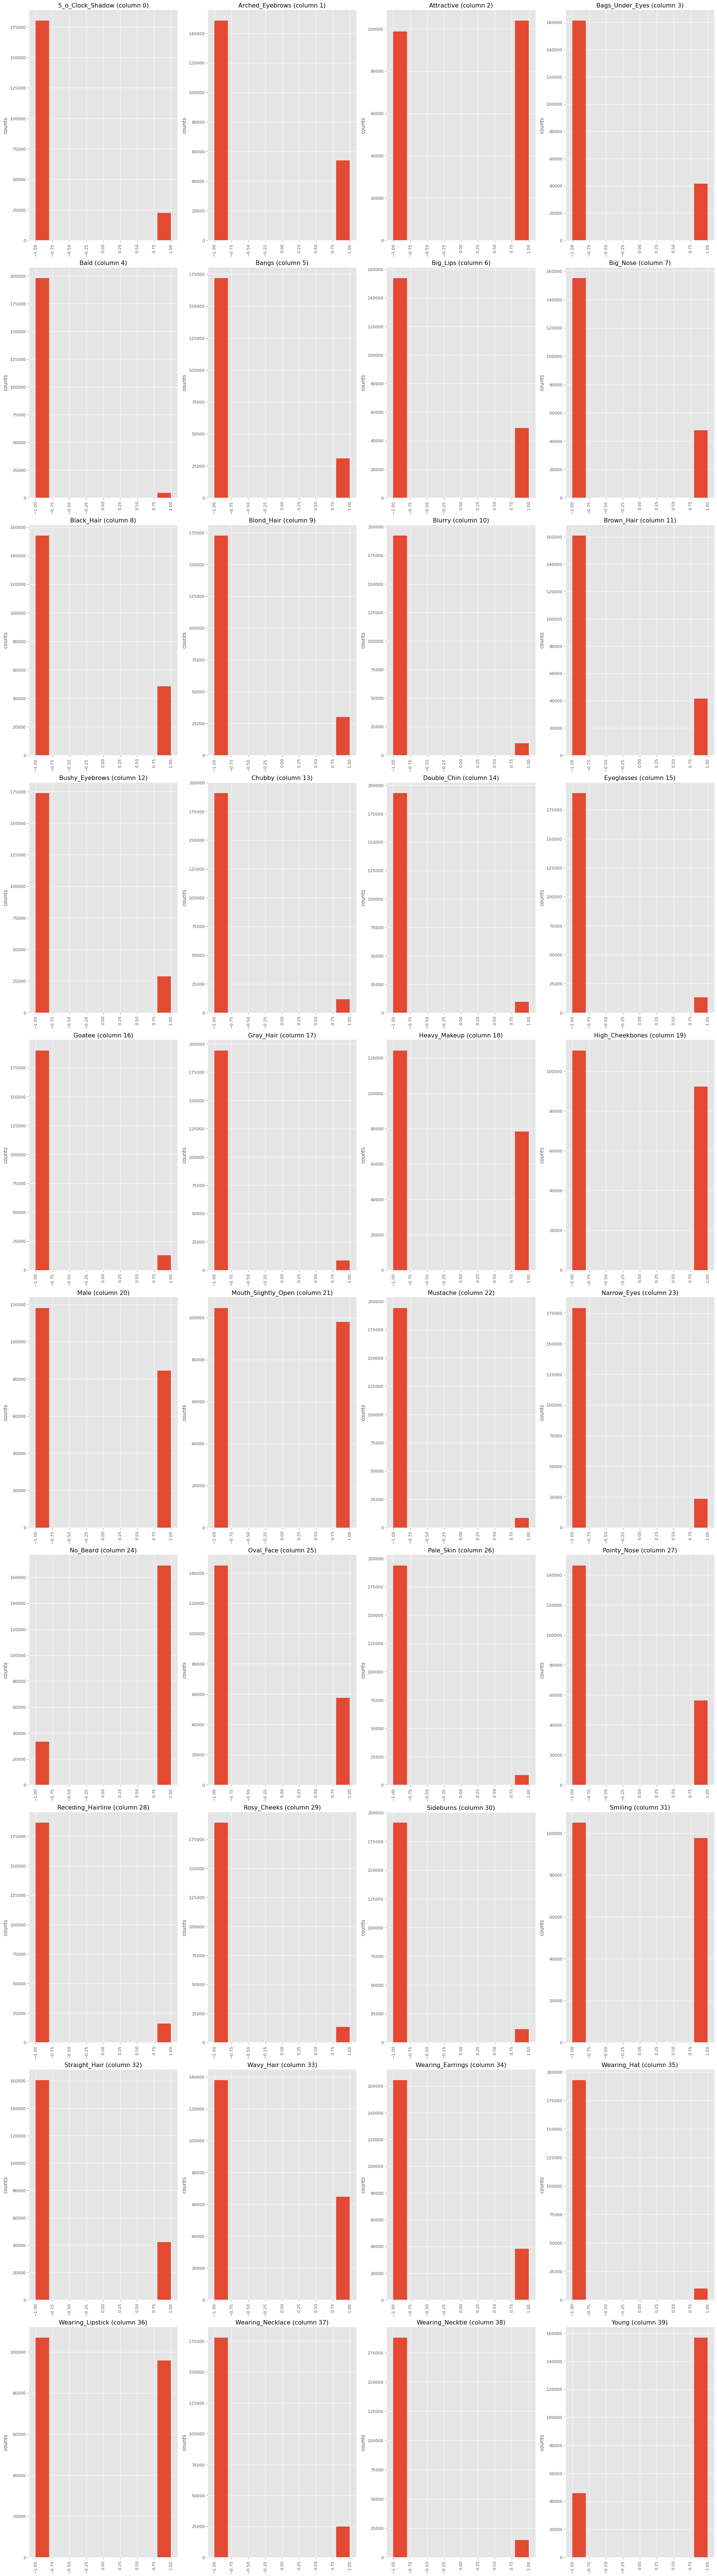

In [152]:
plotPerColumnDistribution(df1, 40, 4)

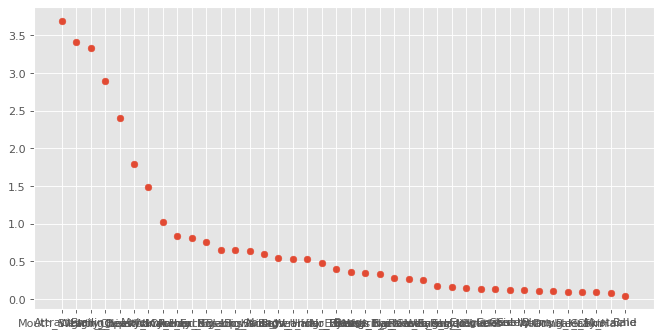

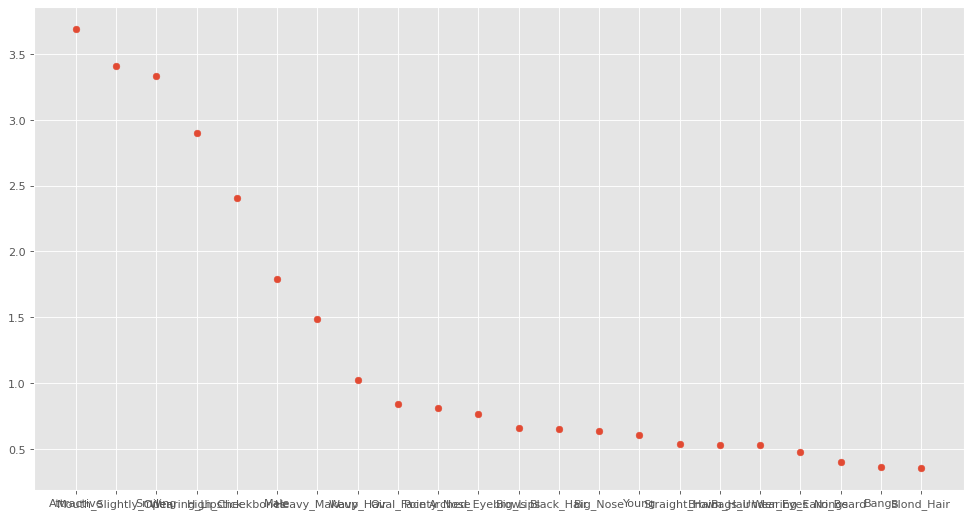

[('Attractive', 39.98401420959147),
 ('Mouth_Slightly_Open', 30.171109456440803),
 ('Smiling', 27.902355047514114),
 ('Wearing_Lipstick', 18.139403706688153),
 ('High_Cheekbones', 11.118983590362769),
 ('Male', 6.006314666034212),
 ('Heavy_Makeup', 4.4217246120604985),
 ('Wavy_Hair', 2.771115153670446),
 ('Oval_Face', 2.3163436803292745),
 ('Pointy_Nose', 2.246631699176083),
 ('Arched_Eyebrows', 2.1457439710227812),
 ('Big_Lips', 1.9289815193898827),
 ('Black_Hair', 1.917552411149496),
 ('Big_Nose', 1.8834679780973718),
 ('Young', 1.8273728454301925),
 ('Straight_Hair', 1.7146883331217468),
 ('Brown_Hair', 1.6960277928927212),
 ('Bags_Under_Eyes', 1.6924574168594988),
 ('Wearing_Earrings', 1.6073290121938641),
 ('No_Beard', 1.4928048807444905),
 ('Bangs', 1.435030209447447),
 ('Blond_Hair', 1.4204216415556008),
 ('Bushy_Eyebrows', 1.3973019387142829),
 ('Wearing_Necklace', 1.3261440175947319),
 ('Narrow_Eyes', 1.2992029036622825),
 ('5_o_Clock_Shadow', 1.2857958836558416),
 ('Receding_

In [153]:
scores=[]
for column in df1:
    if column != 'image_id':
        a = len(df1[df1[column] == 1])
        b = len(df1[df1[column] == -1])
        score = abs(a-b)/(a+b)
        scores.append((column,1/score))
scores.sort(reverse = True)
scores.sort(key=lambda a: a[1])
scores.reverse()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log
N1 = 22
N2 = 40
scores_subset1 = [x for index, x in enumerate(scores) if index < N1]
scores_subset2 = [x for index, x in enumerate(scores) if index < N2]

scores1 = [(elem1, log(elem2)) for elem1, elem2 in scores_subset1]
scores2 = [(elem1, log(elem2)) for elem1, elem2 in scores_subset2]

zip(*scores1)
zip(*scores2)

figure(figsize=(10,5), dpi=80)
plt.scatter(*zip(*scores2))
plt.show()

figure(figsize=(15,8), dpi=80)
plt.scatter(*zip(*scores1))
plt.show()


scores

In [154]:
#We will be using the top 22 most important features for predictions
selected_features = [scores_subset1[i][0] for i in range(len(scores_subset1))]
selected_features

['Attractive',
 'Mouth_Slightly_Open',
 'Smiling',
 'Wearing_Lipstick',
 'High_Cheekbones',
 'Male',
 'Heavy_Makeup',
 'Wavy_Hair',
 'Oval_Face',
 'Pointy_Nose',
 'Arched_Eyebrows',
 'Big_Lips',
 'Black_Hair',
 'Big_Nose',
 'Young',
 'Straight_Hair',
 'Brown_Hair',
 'Bags_Under_Eyes',
 'Wearing_Earrings',
 'No_Beard',
 'Bangs',
 'Blond_Hair']

<ipython-input-151-b87de8981834>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-151-b87de8981834>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


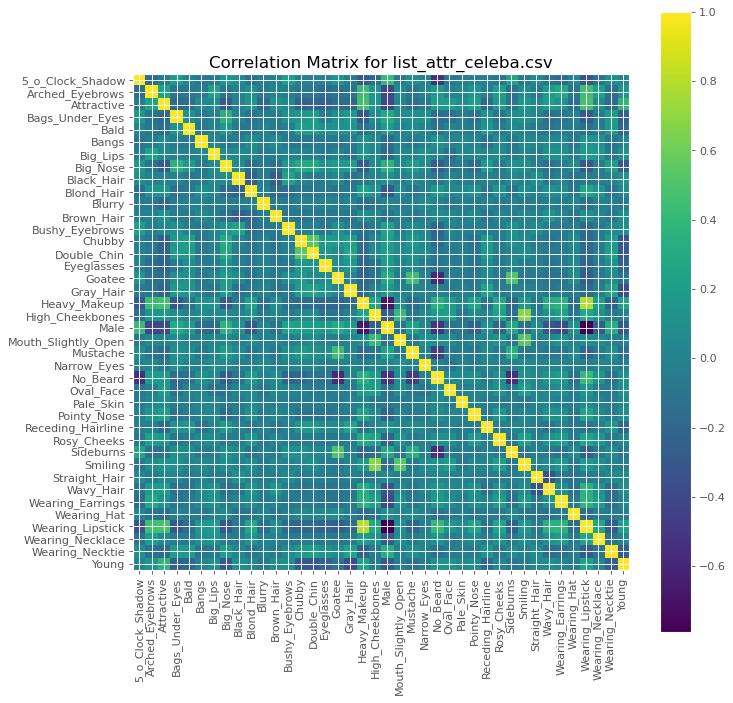

In [155]:
plotCorrelationMatrix(df1, 10)
